In [29]:
##数据预处理buchong
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

path_to_bj_aq = "./months1_10/"
datas = []
bj_csv_list  = os.listdir(path_to_bj_aq)
for csv in bj_csv_list :
    if csv != '.DS_Store' and not csv.startswith("._") :

        path_to_file = path_to_bj_aq + csv
        data = pd.read_csv(path_to_file)  
        if data.empty == False:
            datas.append(data)

train = pd.concat(datas, ignore_index=True)

In [30]:
data = train.groupby(['time_stamp','loc_id'],as_index = False).count()
data

,time_stamp,loc_id,phone_id
0,2017-01-01 00,1,120
1,2017-01-01 00,2,174
2,2017-01-01 00,3,62
3,2017-01-01 00,4,73
4,2017-01-01 00,5,111
5,2017-01-01 00,6,87
6,2017-01-01 00,8,35
7,2017-01-01 00,11,148
8,2017-01-01 00,12,28
9,2017-01-01 00,13,38


In [31]:
# ##数据预处理buchong
# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('whitegrid')
# %matplotlib inline

# path_to_bj_aq = "./month11/"
# datas = []
# bj_csv_list  = os.listdir(path_to_bj_aq)
# for csv in bj_csv_list :
#     if csv != '.DS_Store' and not csv.startswith("._") :

#         path_to_file = path_to_bj_aq + csv
#         data = pd.read_csv(path_to_file)  
#         if data.empty == False:
#             datas.append(data)

# predict = pd.concat(datas, ignore_index=True)
# predict = predict.groupby(['time_stamp','loc_id'],as_index = False).count()
# predict.to_csv('submit11.csv',index = False)
predict = pd.read_csv('submitkankan_qushang11.csv')
predict.rename(index=str, columns={"num_of_people": "phone_id"},inplace = True)
data = pd.concat([data, predict])
data['time_stamp'] = pd.to_datetime(data['time_stamp'])

data['date'] = data['time_stamp'].apply(lambda x:str(x)[:10])
data['hour'] = data['time_stamp'].apply(lambda x:int(str(x)[11:13]))
data['week'] = data['time_stamp'].apply(lambda x:x.weekday())
data = data.reset_index(drop=True) 


In [32]:
data_al = data
data_al

,loc_id,phone_id,time_stamp,date,hour,week
0,1,120.0,2017-01-01 00:00:00,2017-01-01,0,6
1,2,174.0,2017-01-01 00:00:00,2017-01-01,0,6
2,3,62.0,2017-01-01 00:00:00,2017-01-01,0,6
3,4,73.0,2017-01-01 00:00:00,2017-01-01,0,6
4,5,111.0,2017-01-01 00:00:00,2017-01-01,0,6
5,6,87.0,2017-01-01 00:00:00,2017-01-01,0,6
6,8,35.0,2017-01-01 00:00:00,2017-01-01,0,6
7,11,148.0,2017-01-01 00:00:00,2017-01-01,0,6
8,12,28.0,2017-01-01 00:00:00,2017-01-01,0,6
9,13,38.0,2017-01-01 00:00:00,2017-01-01,0,6


In [41]:
data_all = data_al.groupby(['date'],as_index = False)['phone_id'].sum()
data_all.iloc[249:]

,date,phone_id
249,2017-09-10,403441.000000
250,2017-09-11,469645.000000
251,2017-09-12,459988.000000
252,2017-09-13,441669.000000
253,2017-09-14,440533.000000
254,2017-09-15,424304.000000
255,2017-09-16,372639.000000
256,2017-09-17,373457.000000
257,2017-09-18,446074.000000
258,2017-09-19,446174.000000


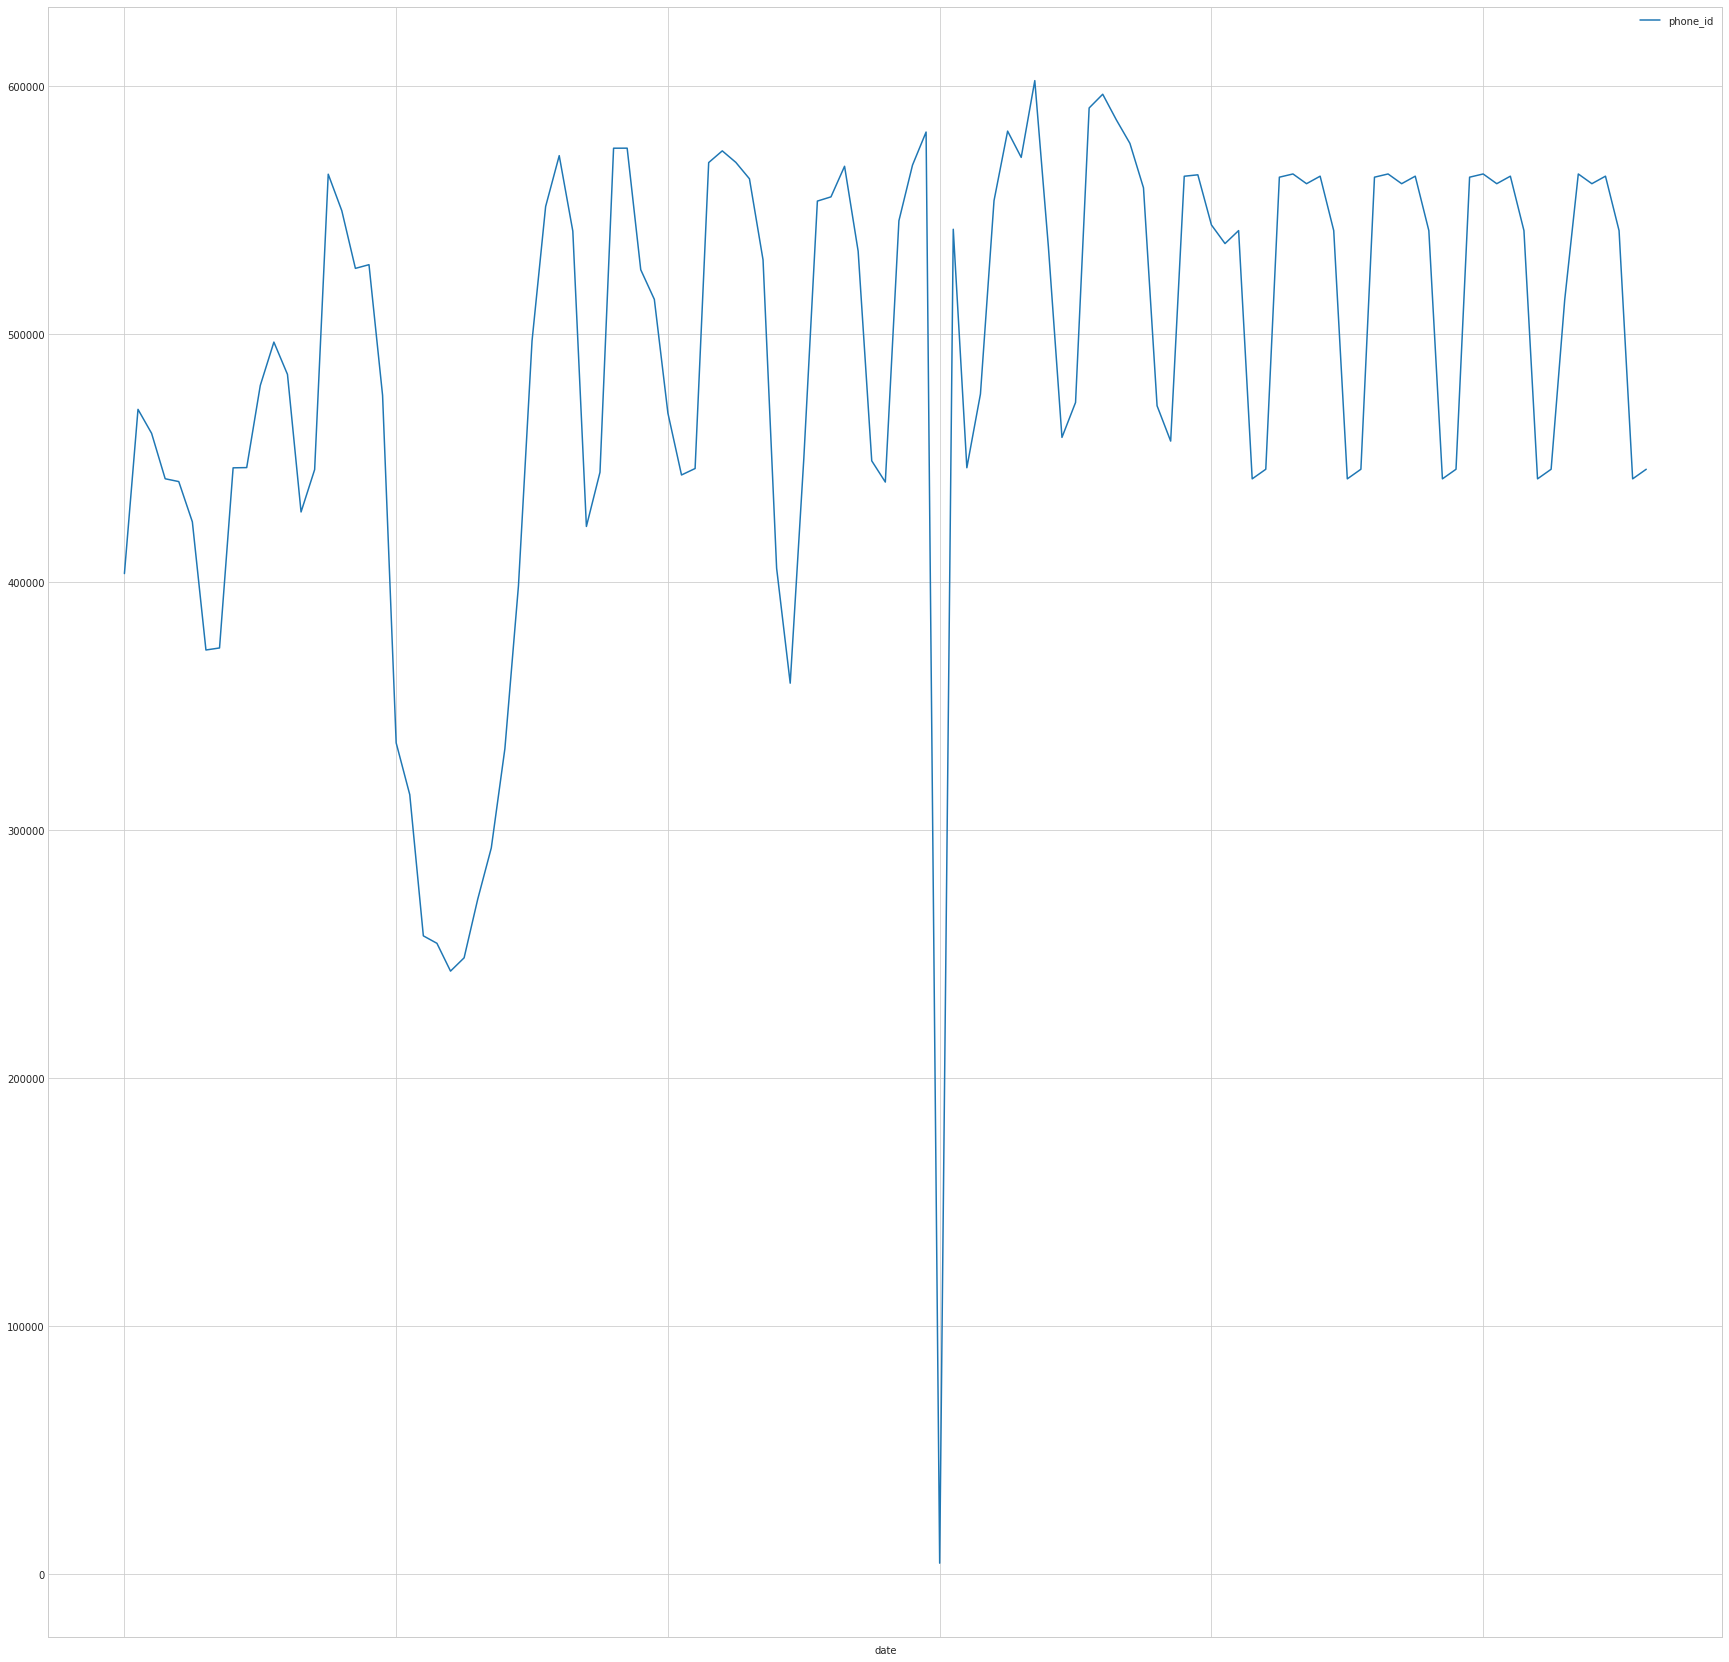

In [42]:
data_all.iloc[249:].plot('date','phone_id',figsize=(30,30))

In [23]:
# # data_2 = data[(data['hour'] ==17)][(data['loc_id'] ==29)]
# data_2 = data
# data_2 = data_2.groupby(['date'],as_index = False)['phone_id'].sum()
# data_2
# # data_2.loc[145:173].plot('date','phone_id',figsize=(30,30))
# data_2.iloc[270:326].plot('date','phone_id',figsize=(30,30))

In [60]:
data_tongji = data_all.iloc[249:269]
sum_train1 = data_tongji['phone_id'].sum()
count_train1 = data_tongji['phone_id'].count()
print(sum_train1)
print(count_train1)

9255254.0
20


In [63]:
data_tongji = data_all.iloc[279:331]
sum_train2 = data_tongji['phone_id'].sum()
count_train2 = data_tongji['phone_id'].count()
print(sum_train2)
print(count_train2)
data_tongji

26679480.0
52


,date,phone_id
279,2017-10-10,497267.0
280,2017-10-11,551424.0
281,2017-10-12,571925.0
282,2017-10-13,541521.0
283,2017-10-14,422439.0
284,2017-10-15,444288.0
285,2017-10-16,574926.0
286,2017-10-17,574943.0
287,2017-10-18,525934.0
288,2017-10-19,513992.0


In [62]:
data_tongji = data_all.iloc[331:]
sum_test = data_tongji['phone_id'].sum()
count_test = data_tongji['phone_id'].count()
print(sum_test)
print(count_test)


16102972.990476187
31


In [64]:
rate1 = (sum_train1+sum_train2)/(count_train1+count_train2)
rate2 = sum_test/count_test

In [65]:
rate1

499093.52777777775

In [66]:
rate2

519450.74162826414

In [67]:
rate = rate1/rate2

In [68]:
rate

0.960810116881006